# CoinGecko REST API: extracting crypto currency data

## Libraries and settings

In [1]:
# Libraries
import os
import fnmatch
import locale
# RGE: what is this doing?
locale.setlocale(locale.LC_ALL,"") 

import matplotlib.pyplot as plt

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: c:\Users\Roger\Desktop\WI22\applied_data_science\ADS_PROJECT\githubTest


## Get data

In [10]:
# Simple price endpoint with the required parameters
cg.get_price(ids='dogecoin', vs_currencies='usd')

{'dogecoin': {'usd': 0.087224}}

In [3]:
# Multiple arguments (USD)
cg.get_price(ids=['bitcoin', 'near', 'ethereum', 'dogecoin', 'Banano'], vs_currencies='usd')

{'banano': {'usd': 0.00582217},
 'bitcoin': {'usd': 30258},
 'dogecoin': {'usd': 0.087315},
 'ethereum': {'usd': 2073.19},
 'near': {'usd': 2.18}}

In [4]:
# Multiple arguments (USD & EUR)
cg.get_price(ids=['bitcoin', 'near', 'ethereum, dogecoin', 'Banano'], vs_currencies=['usd', 'eur'])

{'banano': {'usd': 0.00582217, 'eur': 0.00530112},
 'bitcoin': {'usd': 30258, 'eur': 27550},
 'dogecoin': {'usd': 0.087315, 'eur': 0.079501},
 'ethereum': {'usd': 2073.19, 'eur': 1887.65},
 'near': {'usd': 2.18, 'eur': 1.98}}

In [5]:
# Pass optional parameters as defined in the API doc (https://www.coingecko.com/api/docs/v3)
data = cg.get_price( ids='bitcoin, near, ethereum, dogecoin, Banano', 
                     vs_currencies='usd', 
                     include_market_cap='true', 
                     include_24hr_vol='true', 
                     include_24hr_change='true', 
                     include_last_updated_at='true')
data

{'banano': {'usd': 0.00582217,
  'usd_market_cap': 8619337.845242249,
  'usd_24h_vol': 26126.65565103675,
  'usd_24h_change': 0.9733240549558408,
  'last_updated_at': 1681492422},
 'bitcoin': {'usd': 30258,
  'usd_market_cap': 585108430793.0284,
  'usd_24h_vol': 20477509940.890526,
  'usd_24h_change': -0.4388723932686243,
  'last_updated_at': 1681492428},
 'dogecoin': {'usd': 0.087315,
  'usd_market_cap': 12122904425.329971,
  'usd_24h_vol': 1210768818.3382502,
  'usd_24h_change': -0.2469371599061158,
  'last_updated_at': 1681492425},
 'ethereum': {'usd': 2073.19,
  'usd_market_cap': 249043177297.47394,
  'usd_24h_vol': 16967939370.993822,
  'usd_24h_change': 3.166985223149884,
  'last_updated_at': 1681492429},
 'near': {'usd': 2.18,
  'usd_market_cap': 1924852639.2177474,
  'usd_24h_vol': 167237604.37865794,
  'usd_24h_change': -0.358029532812144,
  'last_updated_at': 1681492424}}

In [6]:
# Extract single values
names = list(data.keys())
print(names)
print("----------------")

# Price of the first element in list
print(names[0])
print(data[names[0]]["usd"])

['banano', 'bitcoin', 'dogecoin', 'ethereum', 'near']
----------------
banano
0.00582217


## Extract and plot data

In [7]:
# Keys from dictionary
names = list(data.keys())
print(names)
  
# Get values from dictionary   
values = []
for i in range(len(names)):
    vals = data[names[i]]["usd"]
    values.append(vals)
print(values)

['banano', 'bitcoin', 'dogecoin', 'ethereum', 'near']
[0.00582217, 30258, 0.087315, 2073.19, 2.18]


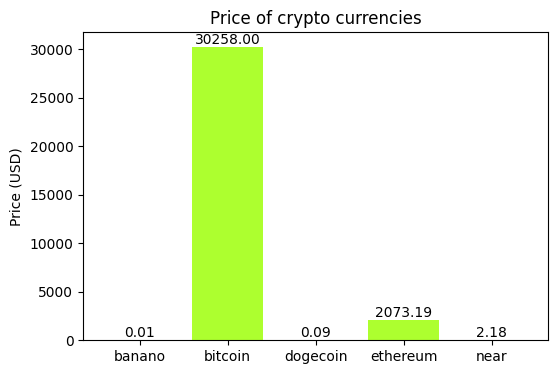

In [8]:
# Plot data
fig, ax = plt.subplots(figsize=(6,4))

bar_x          = [1,2,3,4,5]
bar_height     = values
bar_tick_label = names
bar_label      = ["%.2f" % i for i in values]

bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label,color='greenyellow')
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

autolabel(bar_plot)
plt.ylabel('Price (USD)')
plt.title('Price of crypto currencies')

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-04-14 19:13:54
Python Version: 3.10.9
-----------------------------------
